<img src="ml2_group_assignment.png" width="800"/>

# <font color=green> Introduction </font>

The assignment is focused on solving the Forest Cover Type Prediction: https://www.kaggle.com/c/forest-cover-type-prediction/overview. This task proposes a classification problem: predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data).

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. 

**You must predict the Cover_Type for every row in the test set (565892 observations).**

<img src="tree_types.png" width="800"/>

# <font color=green> Table of contents </font>

* Data Analysis
* Exploratory Data Analysis
* Feature Engineering & Selection
* Compare Several Machine Learning Models
* Perform Hyperparameter Tuning on the Best Model
* Interpret Model Results
* Evaluate the Best Model with Test Data (replying the initiating question)
* Summary & Conclusions

# Sections 
* [Libaries used](#0)
* [1. Import Data](#1)
* [2. Data analysis](#2)  
  * [2.1.Explanation of variables](#2.1)
      * [1.2.1 XX](#2.1.1)
* [3. Exploratory Data Analysis](#3)
  * [3.1 Analysis of the Dataset using EDA](#3.1)
  * [3.2 D'Agostino and Pearson's Test](#3.2)  
  * [3.3 Checking Variable Completeness ](#3.3)
  * [3.4 Correlation Matrix ](#3.4)  
  * [3.5 Paired density, scatterplot matrix and 3D Graphics ](#3.5)   
  * [3.6 Categorial EDA ](#3.6) 
      * [3.6.1 Categorial Bar Diagrams](#3.6.1)  
      * [3.6.2.Violinplot with Dependent Variable](#3.6.2)  
      * [3.6.3.Treemap for categorial Data](#3.6.3) 
* [4. Baseline Model](#4)
  * [4.0 Prepare Data and Standardization](#4.0)
  * [4.1 Random Forest](#4.1) 
  * [4.2 Gradient Boosting](#4.2)  
  * [4.3 Decision Trees](#4.3)
  * [4.4 K-Nearest Neighbors (KNN)](#4.4)  
  * [4.5 Logistic Regression](#4.5) 
  * [4.6 Naive Bayes](#4.6) 


<img src="roosevelt-national-forest.jpeg" width=1200 height=800 align="center">

<a id='0'></a>
# <font color=green> Libraries used </font>

In [1]:
!pip install squarify

In [79]:
import pandas as pd
import numpy as np
import seaborn as sns  # Graphing
import matplotlib.pyplot as plt
import squarify #treemap
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,plot_confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
#from yellowbrick.classifier import ROCAUC
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

<a id='0'></a>
##  <font color=green>0.Import the Data </font>
Let’s load the training data and create data frame

In [89]:
data_train = pd.read_csv("train.csv")

Let's keep the original dataset for later comparisons and make a copy for the FE process

In [90]:
df_original = data_train.copy()

In [6]:
data_train.tail()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
15115  15116       2607     243     23                               258   
15116  15117       2603     121     19                               633   
15117  15118       2492     134     25                               365   
15118  15119       2487     167     28                               218   
15119  15120       2475     197     34                               319   

       Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
15115                               7                              660   
15116                             195                              618   
15117                             117                              335   
15118                             101                              242   
15119                              78                              270   

       Hillshade_9am  Hillshade_Noon  Hillshade_3pm  ...  Soil_Type32  \
15115            170             251            214  ...            0   
15116            249             221             91  ...            0   
15117            250             220             83  ...            0   
15118            229             237            119  ...            0   
15119            189             244            164  ...            0   

       Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
15115            0            0            0            0            0   
15116            0            0            0            0            0   
15117            0            0            0            0            0   
15118            0            0            0            0            0   
15119            0            0            0            0            0   

       Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
15115            0            0            0           3  
15116            0            0            0           3  
15117            0            0            0           3  
15118            0            0            0           3  
15119            0            0            0           3  

[5 rows x 56 columns]

In [106]:
data_test = pd.read_csv("test.csv")
pd.set_option('display.max_columns', None)
data_test.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0  15121       2680     354     14                                 0   
1  15122       2683       0     13                                 0   
2  15123       2713      16     15                                 0   
3  15124       2709      24     17                                 0   
4  15125       2706      29     19                                 0   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                             2684   
1                               0                             2654   
2                               0                             2980   
3                               0                             2950   
4                               0                             2920   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            196             214            156   
1            201             216            152   
2            206             208            137   
3            208             201            125   
4            210             195            115   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6645                 1                 0   
1                                6675                 1                 0   
2                                6344                 1                 0   
3                                6374                 1                 0   
4                                6404                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0

## <font color=green> Dataset split on all features & Normalisation  <font>
Due to excel import, it transforms a new column unnamed

In [151]:
import pandas as pd
all_feat_df = pd.read_csv("all_features_data_train.csv")
all_feat_df = all_feat_df[all_feat_df.columns.drop(list(all_feat_df.filter(regex='Unnamed:')))]
pd.set_option('display.max_columns', None)
all_feat_df.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   Horizontal_Distance_To_Fire_Points  Wilderness_Area1  Wilderness_Area2  \
0                                6279                 1                 0   
1                                6225                 1                 0   
2                                6121                 1                 0   
3                                6211                 1                 0   
4                                6172                 1                 0   

   Wilderness_Area3  Wilderness_Area4  Soil_Type1  Soil_Type2  Soil_Type3  \
0                 0                 0           0           0           0   
1                 0                 0           0           0           0   
2                 0                 0           0           0           0   
3                 0                 0           0           0           0   
4                 0                 0           0           0           0   

   Soil_Type4  Soil_Type5  Soil_Type6  Soil_Type7  Soil_Type8  Soil_Type9  \
0           0           0           0           0           0           0   
1           0           0           0           0           0           0   
2           0           0           0           0           0           0   
3           0           0           0           0           0           0   
4           0           0           0           0           0           0   

   Soil_Type10  Soil_Type11  Soil_Type12  Soil_Type13  Soil_Type14  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            1            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type15  Soil_Type16  Soil_Type17  Soil_Type18  Soil_Type19  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type20  Soil_Type21  Soil_Type22  Soil_Type23  Soil_Type24  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type25  Soil_Type26  Soil_Type27  Soil_Type28  Soil_Type29  \
0            0            0            0            0            1   
1            0            0            0            0            1   
2            0        

For scaling we need to exclude the dummy variables 

In [152]:
column_list = all_feat_df.columns
numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
categorial= [column for column in column_list if column not in scale_numerical ]

In [153]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [154]:
X = data_train.drop(['Cover_Type'], axis=1)
y = data_train['Cover_Type']
column_list = X.columns

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=37,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))

The shape of validation data:(3024, 55) and (3024,) 
The shape of training data:(12096, 55) and (12096,) 


## <font color=green> Dataset split on the new features & Normalisation  <font>

Select features from the feature selection are transferred to cvs

In [8]:
import pandas as pd
X_selected1 = pd.read_csv("X_selected.csv")
y_selected1 = pd.read_csv("y_selected.csv")

In [9]:
X_selected1 = X_selected1[X_selected1.columns.drop(list(X_selected1.filter(regex='Unnamed:')))]
y_selected1 = y_selected1[y_selected1.columns.drop(list(y_selected1.filter(regex='Unnamed:')))]

In [10]:
print(X_selected1.shape)
print(y_selected1.shape)

if X_selected1.shape[0] != y_selected1.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(15120, 21)
(15120, 1)


We need to filter out the dummy variables for the normalization 

In [11]:
column_list = X_selected1.columns
scale_numerical  = [column for column in column_list if 'Soil' not in column and 'Wilderness_Area' not in  column and 'Aspect_North' not in  column and 'Climate' not in  column and 'Family' not in  column and 'Type' not in  column and 'complex' not in  column and 'Aspect_East' not in  column and 'Aspect_South' not in  column and 'Aspect_West' not in  column ]
scale_categorial= [column for column in column_list if column not in scale_numerical ]

In [12]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

Splitting the data into train and validation test 

In [15]:
column_list = X_selected1.columns

X_train_new, X_val_new, y_train_new, y_val_new = train_test_split(X_selected1, y_selected1, test_size=0.20, random_state=42,stratify=y_selected1)
print("The shape of validation data:{} and {} ".format(X_val_new.shape,y_val_new.shape))
print("The shape of training data:{} and {} ".format(X_train_new.shape,y_train_new.shape))

The shape of validation data:(3024, 21) and (3024, 1) 
The shape of training data:(12096, 21) and (12096, 1) 


In [16]:
X_train_new[scale_numerical] = scaler.fit_transform(X_train_new[scale_numerical])
X_val_new[scale_numerical] = scaler.fit_transform(X_val_new[scale_numerical])

In [17]:
y_train_new = y_train_new.values.ravel()
y_val_new = y_val_new.values.ravel()

In [18]:
X_train_new.head()

Wilderness_Area1  Subalpine_Climate  Wilderness_Area4  \
14128                 0                  0                 0   
4425                  0                  1                 0   
909                   1                  1                 0   
5123                  0                  0                 0   
10901                 0                  0                 0   

       Wilderness_Area3  Family_Moran  Elevation_+_Slope  \
14128                 1             0           0.550556   
4425                  1             0           0.504550   
909                   0             0           0.532861   
5123                  1             0           0.487867   
10901                 1             0           0.350354   

       Elevation_+_Hillshade_Noon  Elevation_+_Hillshade_9am  \
14128                    0.547972                   0.566995   
4425                     0.516815                   0.508374   
909                      0.546983                   0.541379   
5123                     0.494560                   0.510345   
10901                    0.355094                   0.351232   

       Elevation_+_Hillshade_3pm  Elevation  ...  Soil_Type3  Soil_Type12  \
14128                   0.533237   0.543303  ...           0            0   
4425                    0.539017   0.506546  ...           0            0   
909                     0.564066   0.536254  ...           0            0   
5123                    0.486513   0.485398  ...           0            0   
10901                   0.384875   0.350453  ...           0            0   

       Rock_outcrop_complex  Lower_Montane_Climate  \
14128                     0                      0   
4425                      0                      0   
909                       0                      0   
5123                      0                      0   
10901                     1                      0   

       Horizontal_Distance_To_Roadways^2  Family_Catamount  \
14128                           0.078302                 1   
4425                            0.058748                 0   
909                             0.542542                 0   
5123                            0.107116                 1   
10901                           0.084766                 1   

       Elevation_x_Hillshade_Noon  Elevation_+_Vertical_Distance_To_Hydrology  \
14128                    0.637583                                    0.541972   
4425                     0.655608                                    0.423590   
909                      0.685116                                    0.462764   
5123                     0.628189                                    0.420577   
10901                    0.481630                                    0.300043   

       Elevation_+_Aspect  Elevation^2  
14128            0.519913     0.457033  
4425             0.552381     0.419638  
909              0.575758     0.449788  
5123             0.467100     0.398550  
10901            0.434199     0.271307  

[5 rows x 21 columns]

# <font color=green> 7 Re-run models with the new selected features  <font>
## <font color=green> Dataset split on the new features  <font>
Some classes such as SDG classifier , Random Forest classifier and naive Bayes classifier can handle mutliple classes naively. Others like logistic regression or Support Vector Machine classifier are stricly binary classifier. However there are various strategies to perform multiclass classification with multiple binary classifiers. 
* Decision Trees
* Random Forest (XGB Boost)
* KNN
* Logistic Regression 

Checking Correlation among features 

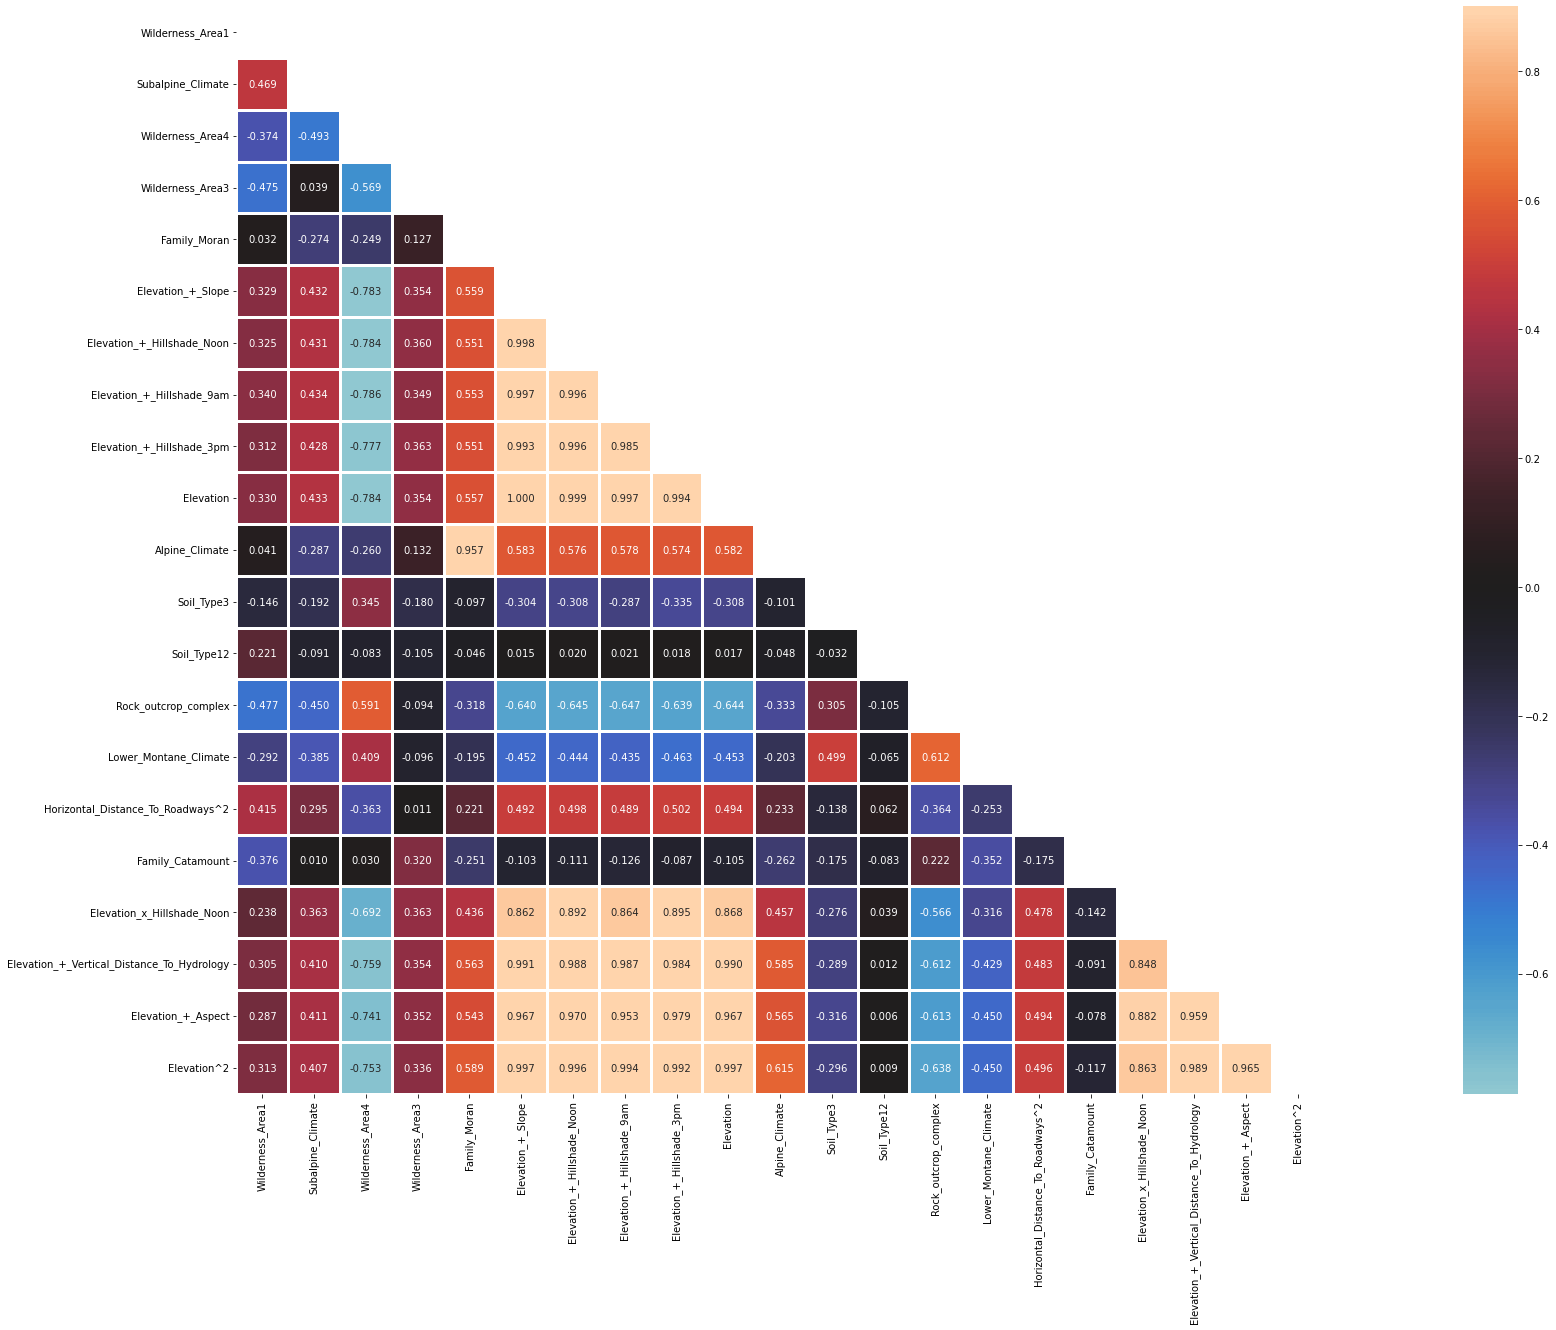

In [19]:
#Heatmap - Checking for autocorrelation among variables 
matrix = X_selected1.corr()
mask = np.zeros_like(matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(50,20))
heatmap = sns.heatmap(matrix, center=0, fmt=".3f", square=True, annot=True, linewidth=1.3, mask = mask,vmax=0.9);
plt.show()

## <font color=green> 7.1. KNN  <font>
KNN is better on smaller dataset, however we will evaluate the performance of this model 

In [20]:
from sklearn.neighbors import KNeighborsClassifier

To find out the best value for k we will use a for loop, and with the range from 1 to 200 range (1,200,10). I reduced the range to 10 but will use iterations of 1. And it gives me the best K = 1. 

In [52]:
k_neighbors_list = range (1,100,1)

results_list = []

for k in k_neighbors_list:
    clf = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    clf.fit(X_train_new, y_train_new)
    y_pred_test = clf.predict(X_val_new)
    acc_k = accuracy_score(y_val_new, y_pred_test)
    
    results_list.append({
        "k": k,
        "acc": acc_k
    })
    
results = pd.DataFrame(results_list)

p = 1 (Manhatten Distance), the best k = 8 with accuracy= 0.759259
p = 2 (Euclidean Distance), the best k = 1 with accuracy = 0.761905

In [45]:
test = results.sort_values('acc', ascending = False) 
test

k       acc
7    8  0.759259
10  11  0.758267
11  12  0.757937
9   10  0.757275
12  13  0.756944
..  ..       ...
91  92  0.689484
86  87  0.689484
98  99  0.689484
93  94  0.689153
94  95  0.688823

[99 rows x 2 columns]

Text(0, 0.5, 'Testing Accuracy')

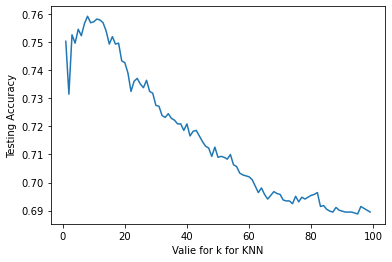

In [46]:
plt.plot(results['k'],results['acc'])
plt.xlabel('Valie for k for KNN')
plt.ylabel('Testing Accuracy')

In [74]:
k_neighbors_list = range (1,40,1)

K_scores = []

for k in k_neighbors_list:
    # Run KNeighborsClassifier with k neighbours 
    knn = KNeighborsClassifier(n_neighbors=k, p=1) # using manhattan_distance 
    # Obtain Cross_val_score for KneighborsClassifier with k neighbors 
    scores = cross_val_score(knn,X_train_new, y_train_new, cv= 5, scoring= "accuracy")
    # Append mean of scores for K neighbors to k_scores list 
    K_scores.append({
        "k": k,
        "acc": scores.mean
    })
    
results = pd.DataFrame(K_scores)

In [88]:
#test = results.sort_values(K_scores, ascending = False) 
#test

Using Grridsearch and cross validation we will adapt the model. <br>
We first create a KNN classifier instance and then prepare a range of values of hyperparameter K from 1 to 31 that will be used by GridSearchCV to find the best value of K.

Furthermore, we set our cross-validation batch sizes cv = 5 and set scoring metrics as accuracy as our preference.

In [ ]:
ROC_AUC is not supported with binary data

In [75]:
cross_valid_scores = {}
parameters = {
    "n_neighbors": list(range(1,20,1)),
    "leaf_size":list(range(1,100,20)),
    "metric":["euclidean","manhattan"]    
}

model_KNN = KNeighborsClassifier()

model_KNN = GridSearchCV(
    model_KNN,
    parameters,
    cv=5,
    scoring = "accuracy"

)
KNN_results = model_KNN.fit(X_train_new, y_train_new)

In [70]:
KNN_results.best_score_
KNN_results.best_estimator_
KNN_results.best_params_

{'leaf_size': 1, 'metric': 'euclidean', 'n_neighbors': 1}

In [77]:
accuracy = KNN_results.best_score_ *100
print("Accuracy for our training dataset with tuning is : {:.2f}%".format(accuracy) )

Accuracy for our training dataset with tuning is : 76.92%


In [87]:
print("Accuracy = {0:.4f}\n".format(accuracy_score(model_KNN.predict(X_val_new), y_val_new)))
print("Classification Report")
print(classification_report(model_KNN.predict(X_val_new), y_val_new))

Accuracy = 0.7619

Classification Report
              precision    recall  f1-score   support

           1       0.64      0.70      0.67       395
           2       0.60      0.65      0.63       399
           3       0.69      0.70      0.70       426
           4       0.89      0.85      0.87       452
           5       0.87      0.81      0.84       468
           6       0.72      0.69      0.71       447
           7       0.92      0.91      0.92       437

    accuracy                           0.76      3024
   macro avg       0.76      0.76      0.76      3024
weighted avg       0.77      0.76      0.76      3024



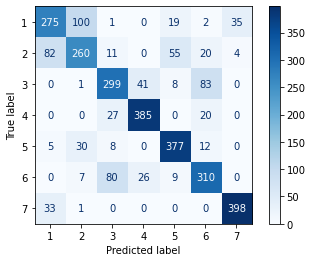

In [85]:
plot_confusion_matrix(model_KNN,X_val_new, y_val_new,cmap=plt.cm.Blues,values_format='d' )

kNN is simple to use and can return very accurate and meaningful results. It also has a tendency to be computationally expensive, so it may not be your best choice for larger datasets. 

## <font color=green> 6.6. Dimensionality reduction with PCA <font>

Principle components capture most of the variance of the data. The first principle components hold the most variance in the data, Each subsequent PCS is orthogonal to the last and has a lesser variance. In this way, given a set of x correlated variables over y samples, you achieve a set of uncorrelated PCS over the same y samples. 

https://plotly.com/python/pca-visualization/

In [ ]:
#Using a 2D Diagram for the two PCAs 

In [159]:
import plotly.express as px
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
#using the normalised dataset 
components = pca.fit_transform(X_train)

fig = px.scatter(components, x=0, y=1, color=y_train)
fig.show()

In [160]:
# First we will observe with a 3D Diagram the first three PCAs
from sklearn.decomposition import PCA
import plotly.express as px

pca = PCA(n_components=3)
components = pca.fit_transform(X_train)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_train,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [161]:
# Run PCA that holds 95% of all variance of the data 
from sklearn.decomposition import PCA
pca = PCA()
x_fit = pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.98)+1

In [162]:
#looking at the two first PCA to see if these can explain the dataset 

you can set the components to the ratio of variance you wish to preserve

In [163]:
pca.explained_variance_ratio_

array([8.57647562e-01, 1.02621145e-01, 3.25438251e-02, 4.80069169e-03,
       1.60545430e-03, 5.96440961e-04, 9.47571016e-05, 6.22888826e-05,
       2.59564570e-05, 1.72427969e-06, 1.00094500e-07, 1.22328480e-08,
       6.15886311e-09, 3.98145723e-09, 2.83197273e-09, 2.31594847e-09,
       2.16002050e-09, 2.07612914e-09, 1.99629335e-09, 1.89149139e-09,
       1.87356128e-09, 1.79943356e-09, 1.71980511e-09, 1.56388506e-09,
       1.33001243e-09, 1.24839502e-09, 1.15066195e-09, 1.09702308e-09,
       1.06996962e-09, 9.68363518e-10, 8.63066780e-10, 8.02855419e-10,
       6.31336112e-10, 5.11151557e-10, 5.04495642e-10, 4.11040354e-10,
       3.60286008e-10, 3.19952087e-10, 2.09752348e-10, 1.69173037e-10,
       1.56420704e-10, 1.43551739e-10, 1.04997362e-10, 6.48369479e-11,
       5.62965922e-11, 4.53495049e-11, 3.05201013e-11, 2.68090274e-11,
       2.56640299e-11, 3.91515248e-12, 3.71593584e-12, 8.55620653e-33,
       8.55620653e-33, 8.55620653e-33, 8.55620653e-33])

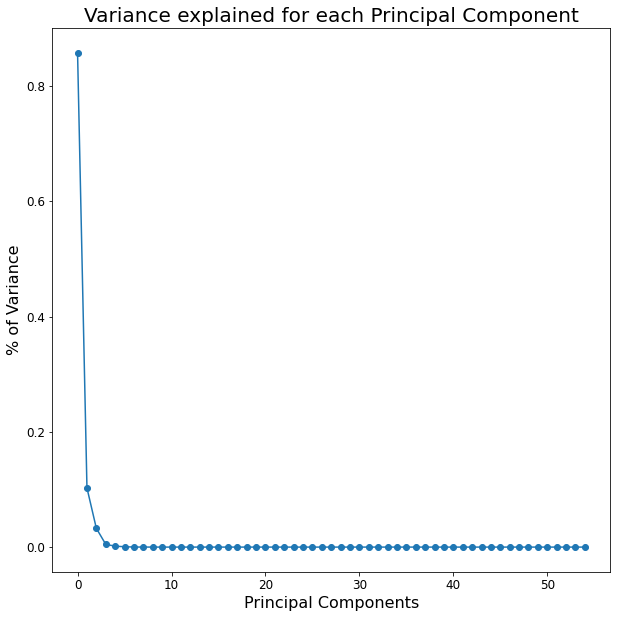

In [164]:
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Variance explained for each Principal Component", fontsize=20)
plt.plot(pca.explained_variance_ratio_, 'o-')
plt.xlabel("Principal Components", fontsize=16)
plt.ylabel("% of Variance", fontsize=16);

It is a bar chart where the height of each bar is the percentage of variance explained by the associated PC. 

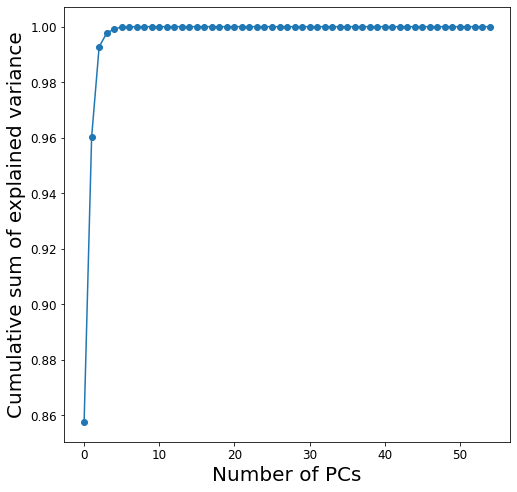

In [165]:
plt.figure(figsize=(8,8))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs', fontsize=20)
plt.ylabel('Cumulative sum of explained variance' , fontsize=20);

Text(0, 0.5, 'Proportion of Variance Explained')

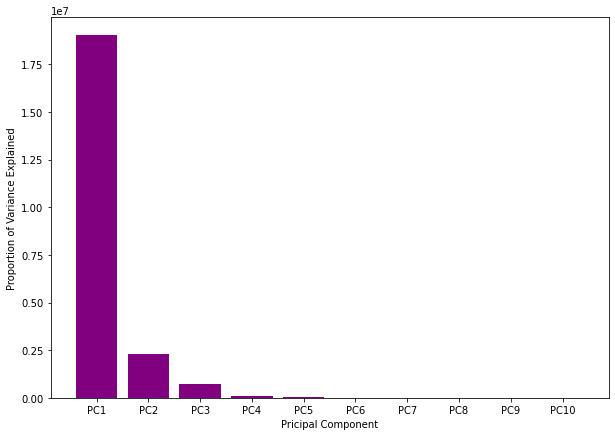

In [166]:
var = pca.explained_variance_[0:10] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10']

plt.figure(figsize=(10,7))
plt.bar(labels,var,color=['purple'])
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

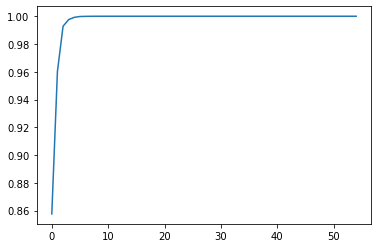

In [167]:
plt.plot(cumsum)


In [168]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"})

On top of that, we can also look at the combinations of variables that created each principal component with pca.components_**2. We could use a heat map to showcase this

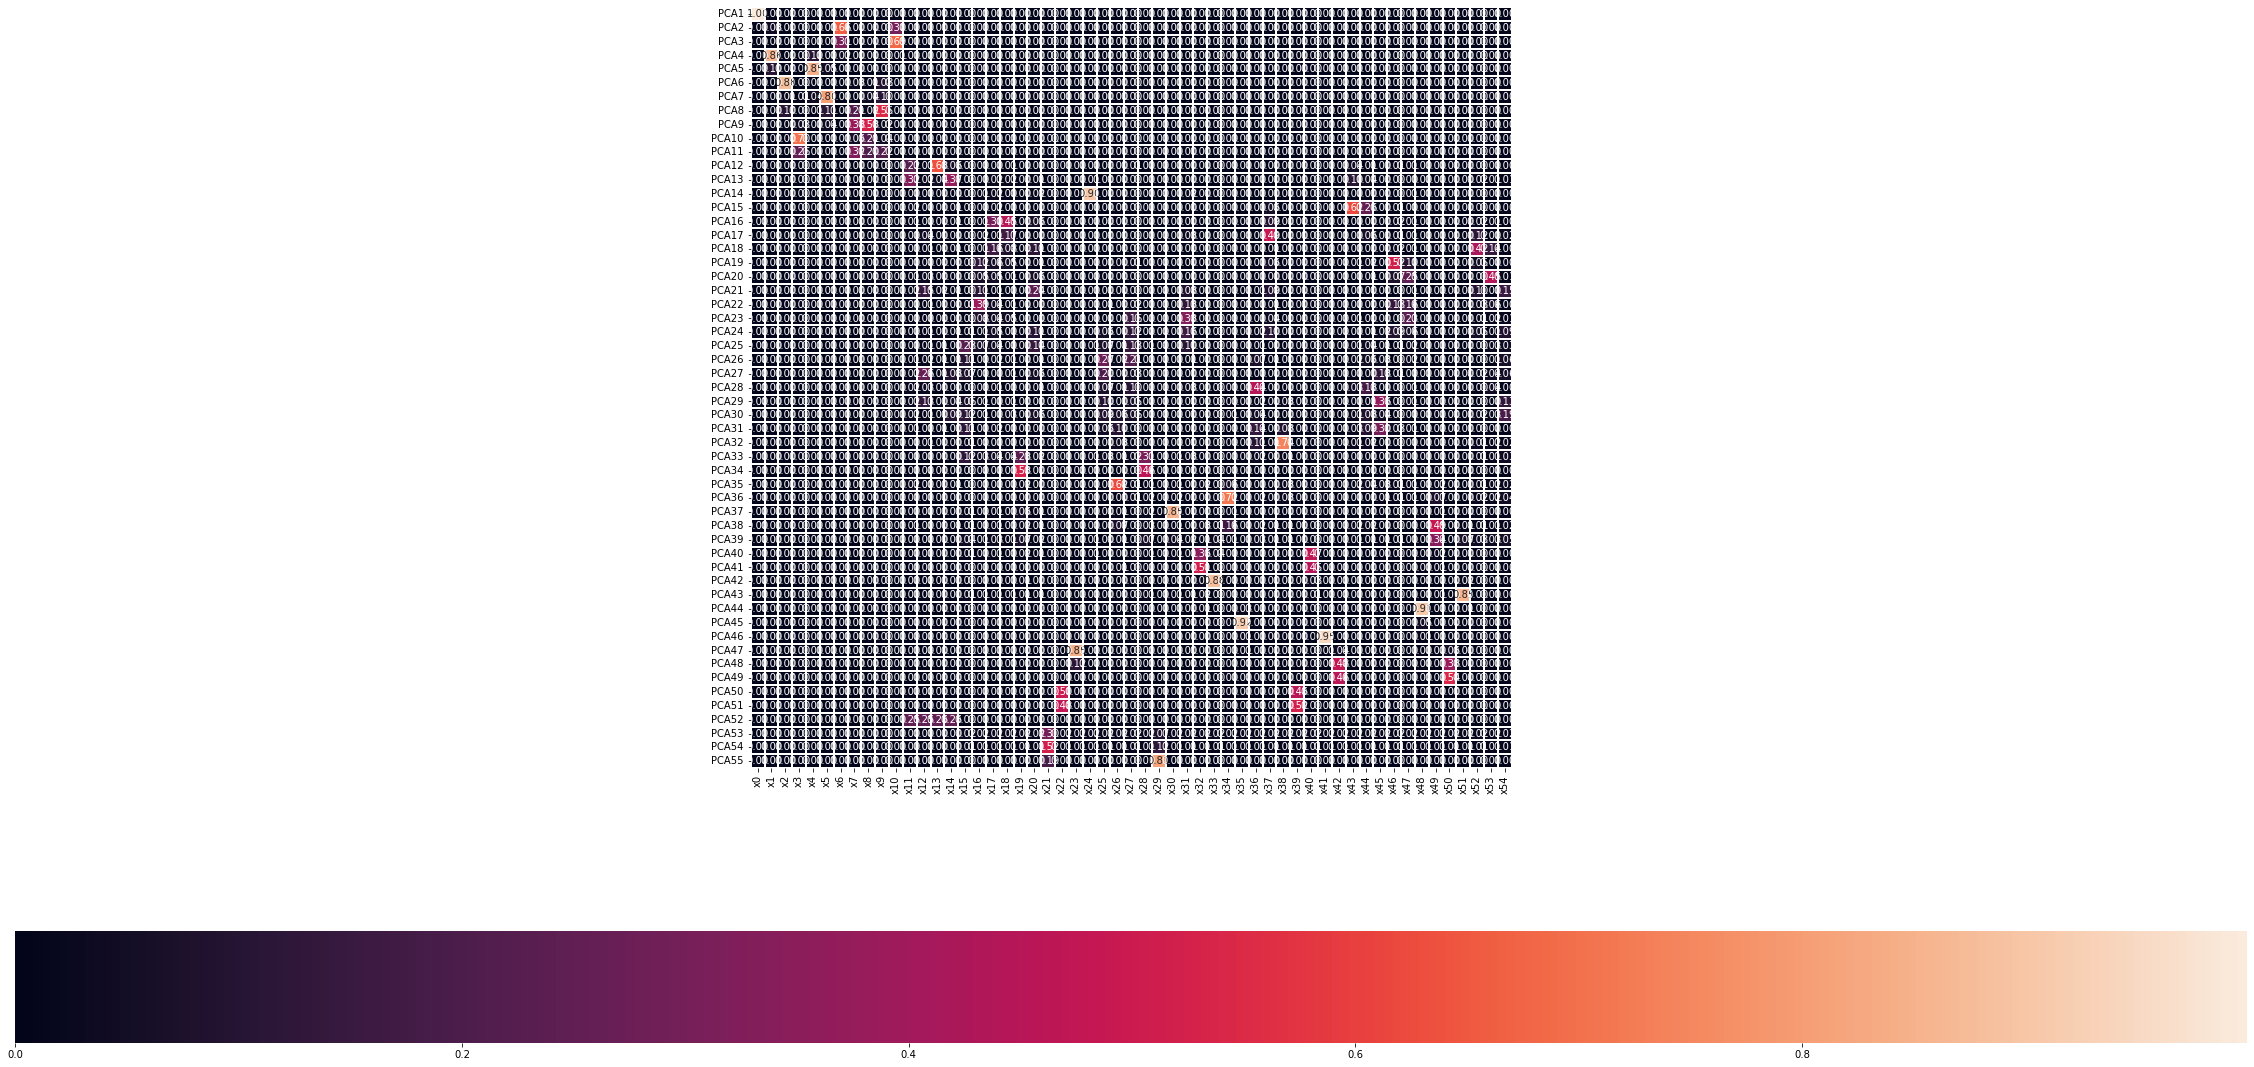

In [120]:
#Heatmap PCA
fig, ax = plt.subplots(figsize=(40,20)) 
col_name = ['x' + str(idx) for idx in range(0, X_train.shape[1])]

_ = sns.heatmap(pca.components_**2,
                 yticklabels=["PCA"+str(x) for x in range(1,pca.n_components_+1)],
                 xticklabels=list(col_name),
                 annot=True,
                 fmt='.2f',
                 square=True,
                 linewidths=0.05,
                 cbar_kws={"orientation": "horizontal"})

In [173]:
https://towardsdatascience.com/principal-component-analysis-pca-explained-visually-with-zero-math-1cbf392b9e7d

SyntaxError: invalid syntax (65669618.py, line 1)

# Everything Together

Let's use the pipeline to wrap everything together and to find the best configuration for the different hyper-parameters



In [181]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()), ('LDA', LinearDiscriminantAnalysis())]) # Pipeline the entire process: Scale the data -> PCA -> LDA Classifier

n_components = list(range(1,40)) # We will try different numbers of principal components

#Parameters of pipelines can be set using ‘__’ separated parameter names:
param_grid = {"pca__n_components":n_components}

estimator = GridSearchCV(pipeline, param_grid, cv=5) # Create a grid search to try all the possible number of PCs
estimator.fit(X, y);

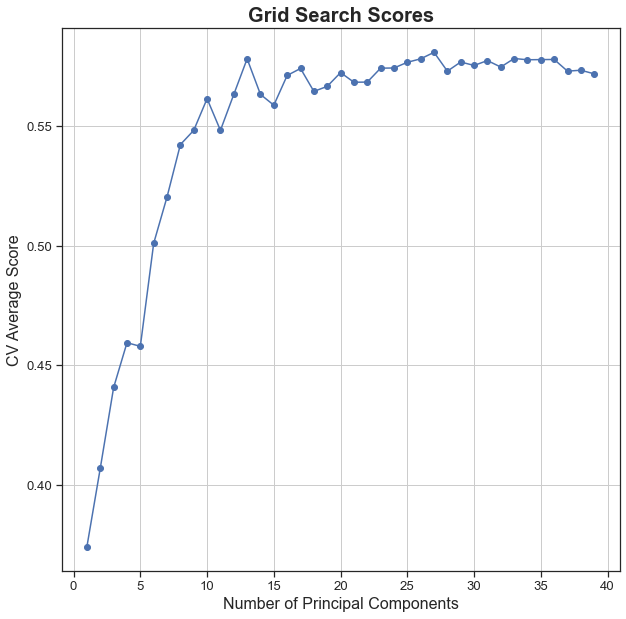

In [182]:
# Get Test Scores Mean and std for each grid search
scores_mean = estimator.cv_results_['mean_test_score']
scores_mean = np.array(scores_mean)

scores_sd = estimator.cv_results_['std_test_score']
scores_sd = np.array(scores_sd)

# Plot Grid search scores
plt.figure(figsize=(10,10))
plt.plot(n_components, scores_mean, '-o')

plt.title("Grid Search Scores", fontsize=20, fontweight='bold')
plt.xlabel("Number of Principal Components", fontsize=16)
plt.ylabel('CV Average Score', fontsize=16)
plt.grid('on')